In [1]:
# Install tensorflow
import tensorflow as tf

In [2]:
# Additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [3]:
# Load in the data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0
print("x_train.shape:", X_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [4]:
# The data is only 2D!
# Convolution expects height x width x color
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print(X_train.shape)

(60000, 28, 28, 1)


In [5]:
# Number of classes 
K = len(set(y_test))
print("Number of classes:", K)

Number of classes: 10


In [6]:
# Build the model using the functional API
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [7]:
# Compile and fit
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

r = model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 16s 5ms/step - loss: 0.6986 - accuracy: 0.7439 - val_loss: 0.4169 - val_accuracy: 0.8430
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3730 - accuracy: 0.8613 - val_loss: 0.3335 - val_accuracy: 0.8745
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3186 - accuracy: 0.8789 - val_loss: 0.3325 - val_accuracy: 0.8738
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2799 - accuracy: 0.8947 - val_loss: 0.3238 - val_accuracy: 0.8783
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2523 - accuracy: 0.9033 - val_loss: 0.2999 - val_accuracy: 0.8903
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2327 - accuracy: 0.9104 - val_loss: 0.2957 - val_accuracy: 0.8962
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2073 - accuracy: 0.9207 - val_loss: 0.2965 - val_accura

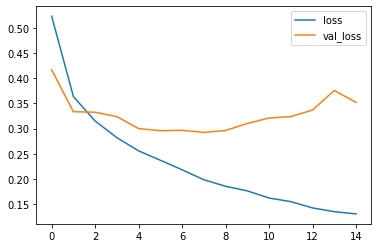

In [8]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

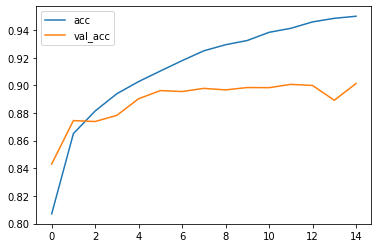

In [9]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[840   3  25  11   2   3 107   0   9   0]
 [  0 980   0  11   2   0   5   0   2   0]
 [ 13   2 855   8  44   1  76   0   1   0]
 [ 10  10  16 905  27   0  31   0   1   0]
 [  0   1  50  20 830   0  97   0   2   0]
 [  0   0   0   0   0 986   1   6   1   6]
 [ 98   0  58  20  72   0 741   0  11   0]
 [  0   0   0   0   0  20   0 917   0  63]
 [  1   0   5   4   2   2   5   2 977   2]
 [  1   0   0   0   0   5   0  11   1 982]]


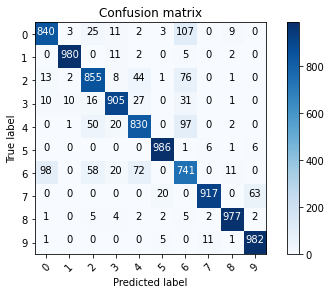

In [11]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [12]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

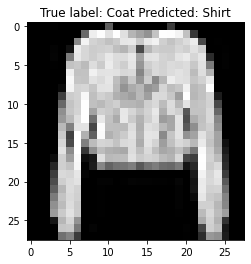

In [33]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));